In [ ]:
import math
import random
import numpy as np
import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.4.0 NVIDIA 000.00'
b'NVIDIA Corporation'


In [ ]:
def addVertex(x,y):
    gl.glVertex2f(x/(WIDTH/2),y/(HEIGHT/2))

def addColor(r,g,b):
    gl.glColor3f(r/255,g/255,b/255)

def drawCircle(x1, y1, x2, y2):
    gl.glBegin(gl.GL_POINTS)

    addVertex(x1 + x2, y1 + y2)
    addVertex(y1 + x2, x1 + y2)
    addVertex(y1 + x2, -x1 + y2)
    addVertex(x1 + x2, -y1 + y2)
    addVertex(-y1 + x2, x1 + y2)
    addVertex(-x1 + x2, y1 + y2)
    addVertex(-x1 + x2, -y1 + y2)
    addVertex(-y1 + x2, -x1 + y2)

    gl.glEnd()

def midpointCircle(x, y, r, n):
    half = r / 2
    d = 1 - r
    x_def = 0
    y_def = r

    while x_def < y_def:
        x_def += 1
        if d < 0:
            d += (2*x_def) + 3
        else:
            d += (2*x_def) - (2*y_def) + 5
            y_def -= 1  
    
        # Outer circle
        drawCircle(x_def, y_def, x, y)
        # Inner circles
        step = 360 // n # angle
        for i in range(0, 360, n):
            drawCircle(x_def / 2, y_def / 2, x + (half * math.cos(i * math.pi / 180)), y + (half * math.sin(i * math.pi / 180)))


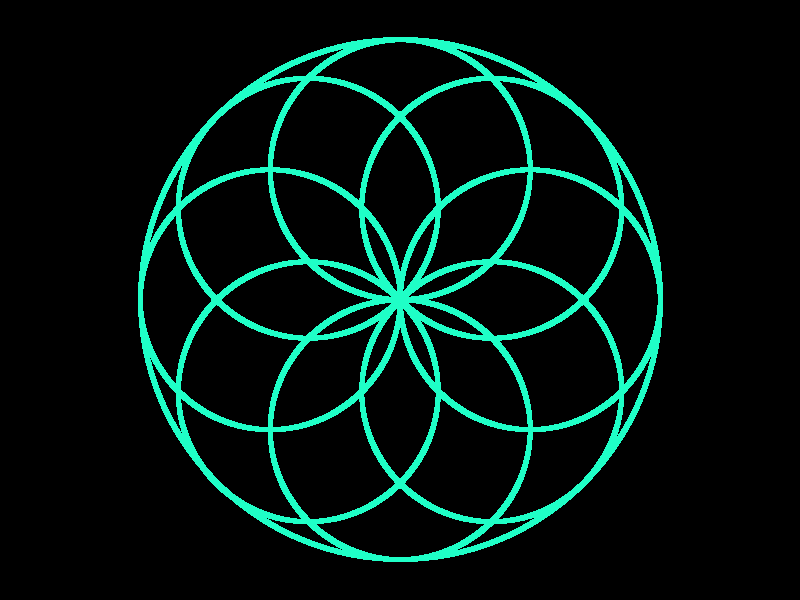

In [ ]:
from IPython.display import display
from PIL import Image

gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glPointSize(5)
addColor(31, 255, 199)
x = 0
y = 0
r = 260
n = int(input('Enter number of circles: '))
midpointCircle(x, y, r, n)

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))
